In [1]:
import pandas as pd
import numpy as np
from google.colab import auth
from google.cloud import storage

auth.authenticate_user()

gcs = storage.Client()

file_path1 = 'gs://jpm_lstm_data/LSTM_prediction.csv'
file_path2 = 'gs://jpm_lstm_data/sperated_tapes.csv'

df_predict = pd.read_csv(file_path1)
df_v = pd.read_csv(file_path2)
print(df_predict.head())

     Unnamed: 0  Open  High  Low      Close
0  2025-04-28-1   158   160  140  152.05226
1  2025-04-28-2   152   161  144  152.44218
2  2025-04-28-3   158   162  142  154.09073
3  2025-04-28-4   161   162  141  155.02562
4  2025-04-28-5   160   160  140  155.11020


In [2]:
df_predict['Open'] = pd.to_numeric(df_predict['Open'], downcast='float')
df_predict['High'] = pd.to_numeric(df_predict['High'], downcast='float')
df_predict['Low'] = pd.to_numeric(df_predict['Low'], downcast='float')
df_predict

,Unnamed: 0,Open,High,Low,Close
0,2025-04-28-1,158.0,160.0,140.0,152.052260
1,2025-04-28-2,152.0,161.0,144.0,152.442180
2,2025-04-28-3,158.0,162.0,142.0,154.090730
3,2025-04-28-4,161.0,162.0,141.0,155.025620
4,2025-04-28-5,160.0,160.0,140.0,155.110200
...,...,...,...,...,...
2245,2025-07-01-46,109.0,113.0,93.0,110.052704
2246,2025-07-01-47,109.0,113.0,93.0,109.887670
2247,2025-07-01-48,109.0,113.0,93.0,109.707230
2248,2025-07-01-49,107.0,113.0,93.0,109.346500


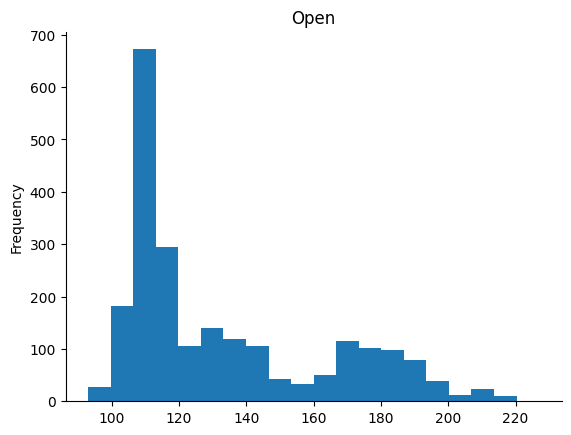

In [4]:
# @title Open

from matplotlib import pyplot as plt
df_predict['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [3]:
df_predict["Volume"]=df_v["Volume"]
df_predict

,Unnamed: 0,Open,High,Low,Close,Volume
0,2025-04-28-1,158.0,160.0,140.0,152.052260,955
1,2025-04-28-2,152.0,161.0,144.0,152.442180,908
2,2025-04-28-3,158.0,162.0,142.0,154.090730,936
3,2025-04-28-4,161.0,162.0,141.0,155.025620,978
4,2025-04-28-5,160.0,160.0,140.0,155.110200,983
...,...,...,...,...,...,...
2245,2025-07-01-46,109.0,113.0,93.0,110.052704,1032
2246,2025-07-01-47,109.0,113.0,93.0,109.887670,1103
2247,2025-07-01-48,109.0,113.0,93.0,109.707230,1098
2248,2025-07-01-49,107.0,113.0,93.0,109.346500,1087


In [33]:
!pip install backtesting
from backtesting import Backtest, Strategy
from backtesting.lib import crossover


class EMACrossoverStrategy(Strategy):
    def init(self, short_window=5, long_window=10):
        self.short_window = short_window
        self.long_window = long_window
        self.trade_count = 0  # Initialize trade counter

    def next(self):
        if self.trade_count < 150:  # Check if maximum trade limit not reached
            if len(self.data) > self.long_window:  # Ensure enough data points for EMA calculation
                short_ema = self.data.Close[-self.short_window:].mean()
                long_ema = self.data.Close[-self.long_window:].mean()

                if short_ema > long_ema:
                    self.buy()
                    self.trade_count += 1  # Increment trade counter
                elif short_ema < long_ema:
                    self.sell()
                    self.trade_count += 1  # Increment trade counter
        else:
            print("Maximum trade limit reached. No more trades will be executed.")

In [34]:


# Pass the strategy instance to the Backtest constructor
bt = Backtest(df_predict, EMACrossoverStrategy,
              cash=10000, commission=.002,
              exclusive_orders=True)

output = bt.run()
print(output)

<ipython-input-34-f35773243a6d>:2: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  bt = Backtest(df_predict, EMACrossoverStrategy,


Maximum trade limit reached. No more trades will be executed.
Maximum trade limit reached. No more trades will be executed.
Maximum trade limit reached. No more trades will be executed.
Maximum trade limit reached. No more trades will be executed.
Maximum trade limit reached. No more trades will be executed.
Maximum trade limit reached. No more trades will be executed.
Maximum trade limit reached. No more trades will be executed.
Maximum trade limit reached. No more trades will be executed.
Maximum trade limit reached. No more trades will be executed.
Maximum trade limit reached. No more trades will be executed.
Maximum trade limit reached. No more trades will be executed.
Maximum trade limit reached. No more trades will be executed.
Maximum trade limit reached. No more trades will be executed.
Maximum trade limit reached. No more trades will be executed.
Maximum trade limit reached. No more trades will be executed.
Maximum trade limit reached. No more trades will be executed.
Maximum 

In [35]:
bt.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p2796', ...)